In [6]:
import pandas as pd


In [7]:
!pip install openpyxl


# data import

In [8]:
import pandas as pd

# Load the dataset
file_path = '/Users/apple/Downloads/Online Retail.xlsx'
try:
    df = pd.read_excel(file_path)
    print("File loaded successfully!")
    print(df.head())  # Preview the first few rows
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


File loaded successfully!
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [10]:
df.shape

(541909, 8)

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Cleaning data

In [12]:
# InvoiceNo (unique transaction ID)
# StockCode (product code)
# Description (product name)
# Quantity (number of items purchased)
# InvoiceDate (date of transaction)
# UnitPrice (price per unit)
# CustomerID (unique customer ID)
# Country (customer's country)

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
df.duplicated().sum()

5268

In [15]:
df.dropna(inplace = True)

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(401604, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [19]:
# Segment customers into groups based on their purchasing behavior to enable personalized marketing strategies.


In [20]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [21]:
df[df['Quantity'] <= 0 ] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [22]:
df = df[(df['Quantity'] > 0)  & (df['UnitPrice'] > 0)]

In [23]:
df.shape

(392692, 8)

# EDA Analysis

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df['sales'] = df['Quantity'] * df['UnitPrice']

In [26]:
group = df.groupby('Country')['sales'].mean()

<Axes: xlabel='Country'>

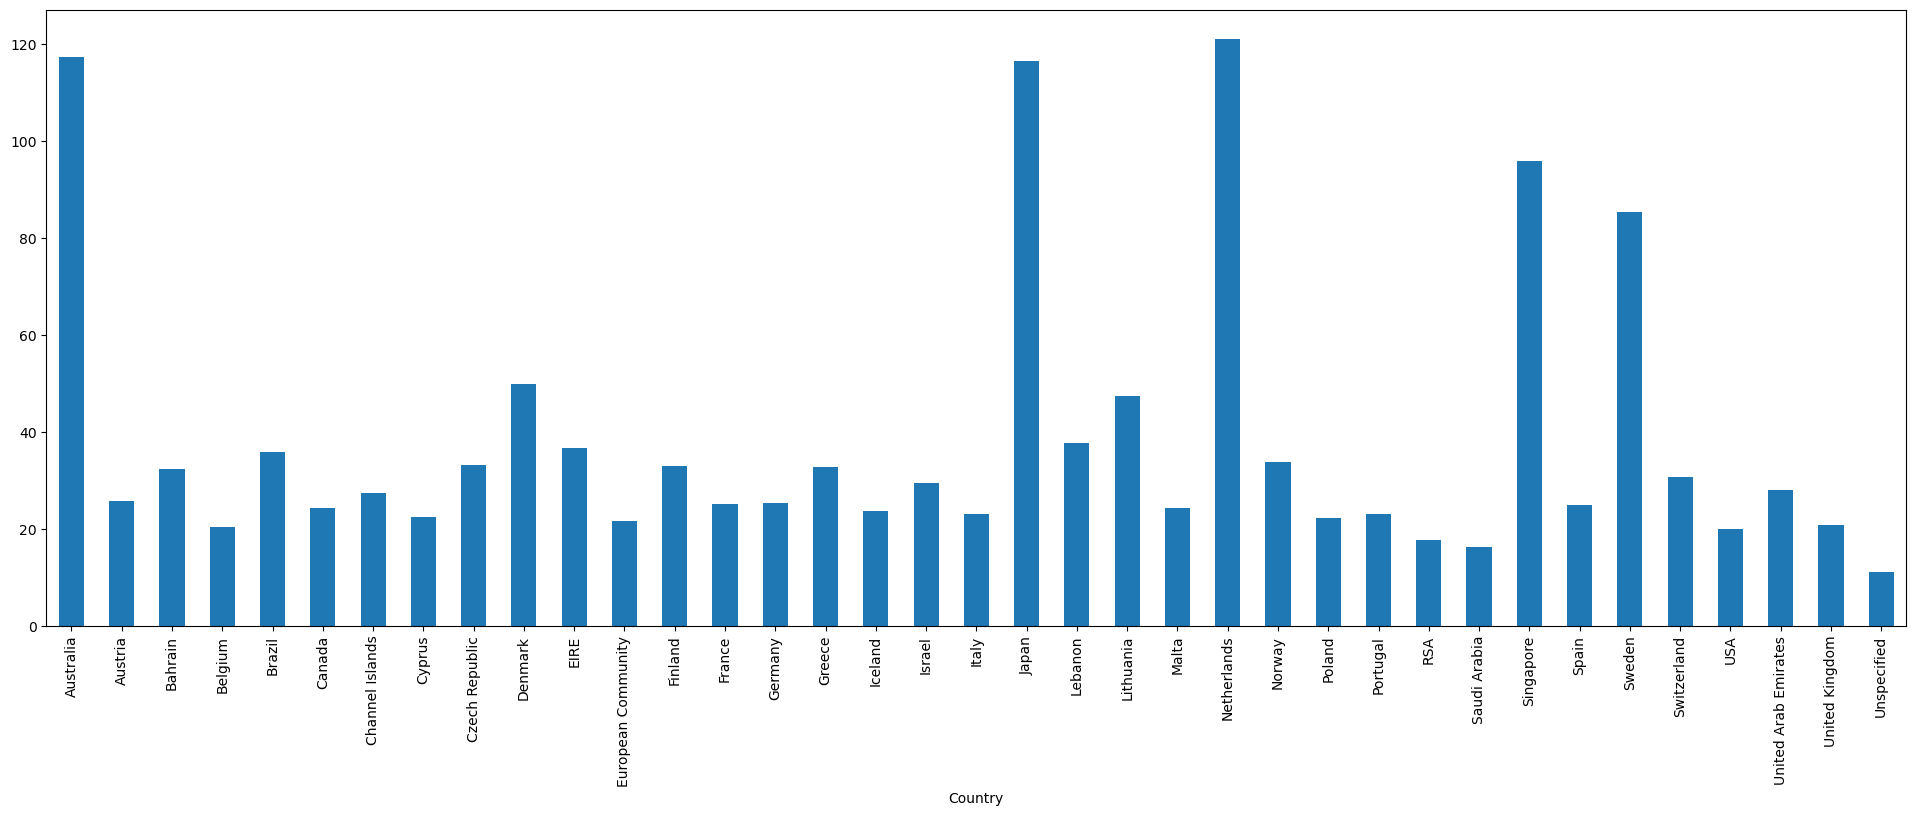

In [27]:
group.plot(kind = 'bar',figsize = (24,8))

<Axes: xlabel='Country'>

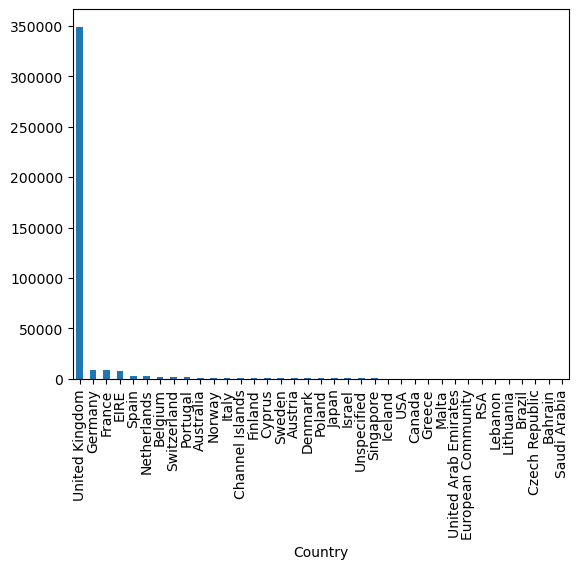

In [19]:
df['Country'].value_counts().plot(kind = 'bar')

In [20]:
df[df['Country']=='Germany']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany,17.70
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany,15.30
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany,10.20
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany,19.80
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany,23.40
...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,15.00
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,24.96


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   sales        392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [28]:
import datetime
df['date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


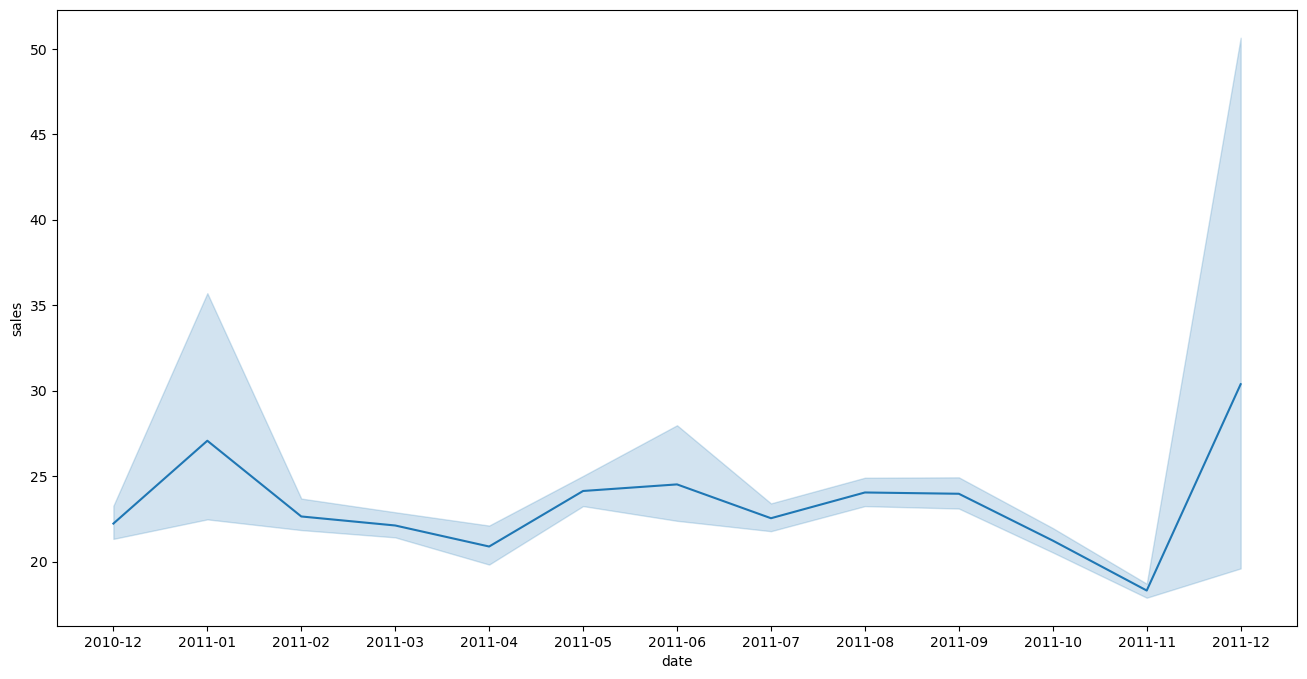

In [29]:
plt.figure(figsize = (16,8))
sns.lineplot(x = df['date'] , y = df['sales'])

plt.show()

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [25]:
# Step 4: Feature Engineering
# Create features such as Recency, Frequency, and Monetary value (RFM):
# Recency: Days since the last purchase.
# Frequency: Number of transactions.
# Monetary: Total amount spent.

In [31]:
df['Description'].shape

(392692,)

In [32]:
import datetime
current_date = pd.to_datetime('2024-11-26')

In [33]:
max_date = df['InvoiceDate'].max()

In [34]:
df['frequency'] = df.groupby(['CustomerID'])['InvoiceNo'].transform('count')

In [35]:
df['recency'] = (max_date - (df['InvoiceDate'])).dt.days
df['total_amount_spend'] = df.groupby(['CustomerID'])['sales'].transform('sum')

In [36]:
data = df[['frequency','recency','total_amount_spend']]

In [37]:
data

,frequency,recency,total_amount_spend
0,297,373,5391.21
1,297,373,5391.21
2,297,373,5391.21
3,297,373,5391.21
4,297,373,5391.21
...,...,...,...
541904,52,0,862.81
541905,52,0,862.81
541906,52,0,862.81
541907,52,0,862.81


/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


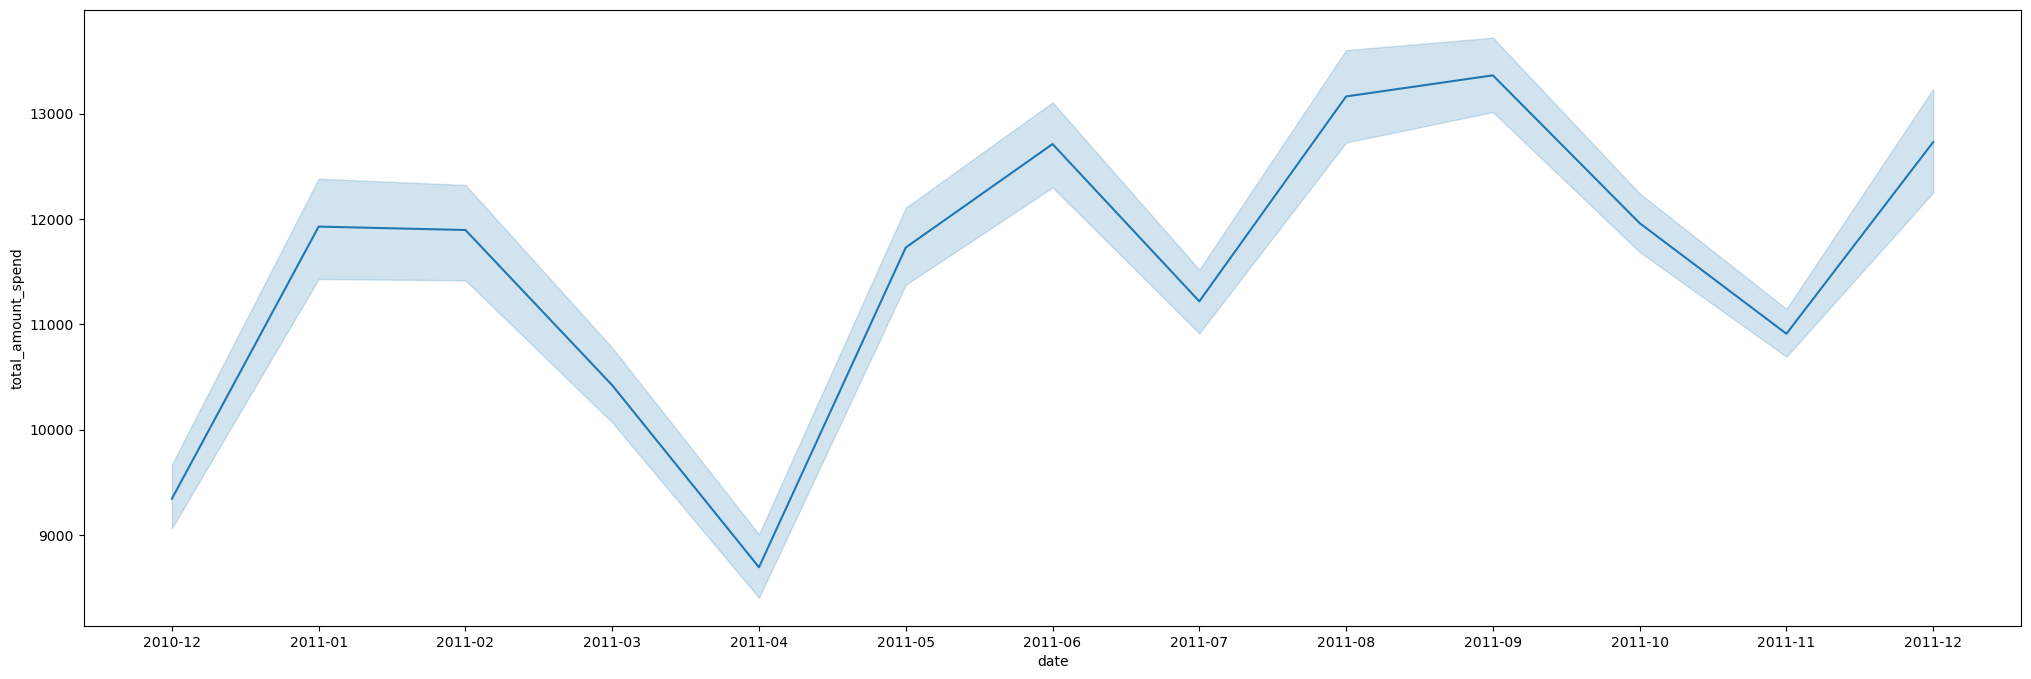

In [80]:
plt.figure(figsize = (25,8))
sns.lineplot(x = df['date'],y=data['total_amount_spend'])
plt.show()

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


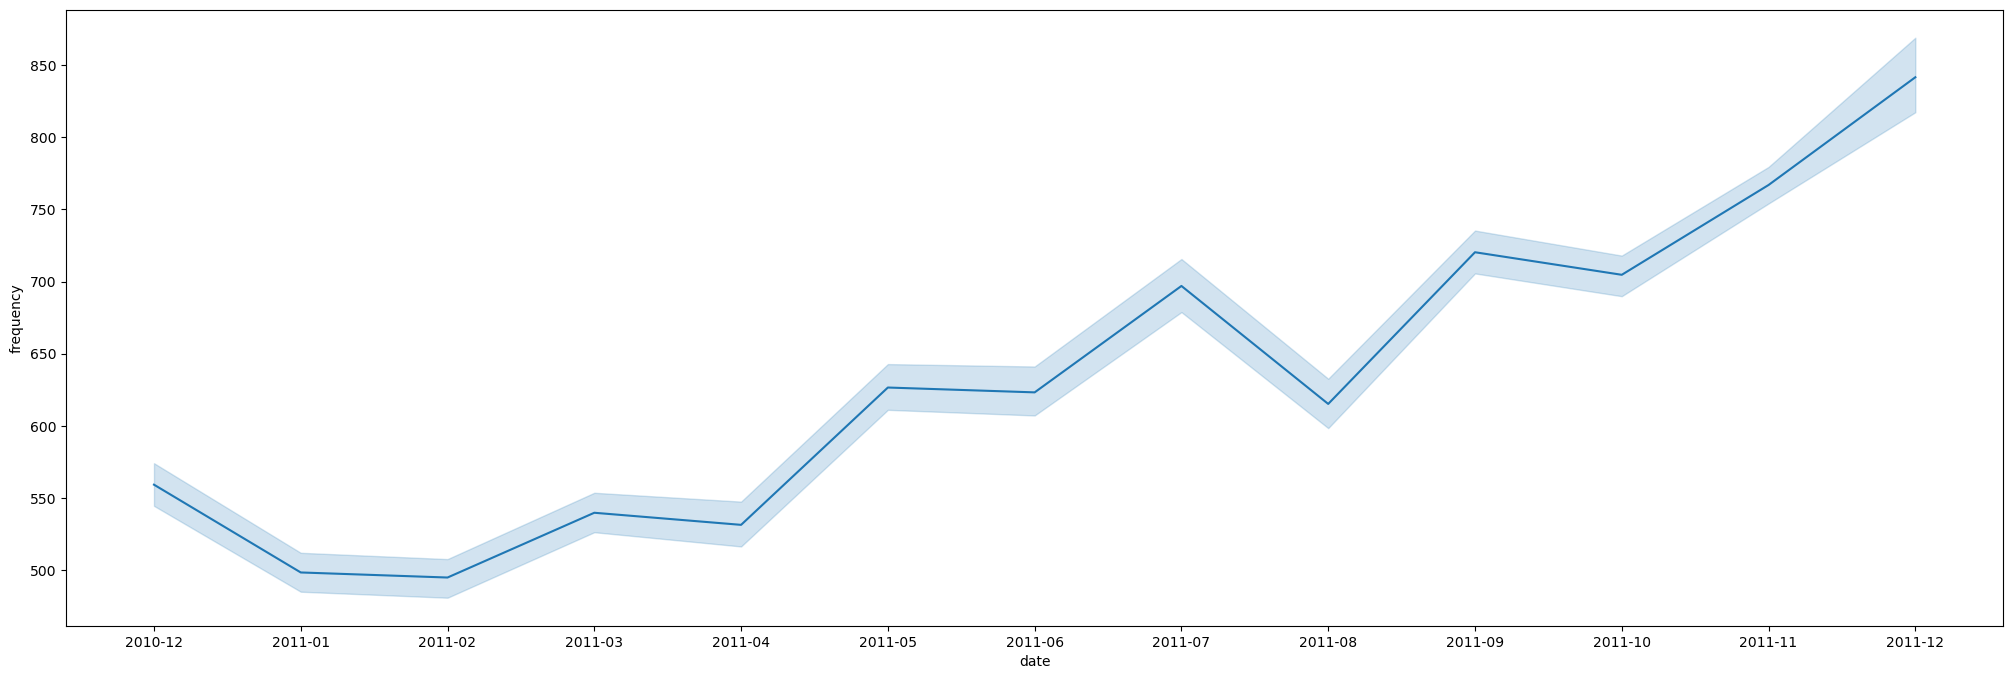

In [82]:
plt.figure(figsize = (25,8))
sns.lineplot(x = df['date'],y=data['frequency'])
plt.show()

# apply scaling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
scalar_transform = scaler.fit_transform(data)

# Apply machine learning model

In [57]:
from sklearn.cluster import KMeans

In [58]:
inertia = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(scalar_transform)
    inertia.append(kmeans.inertia_)

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Elbow')

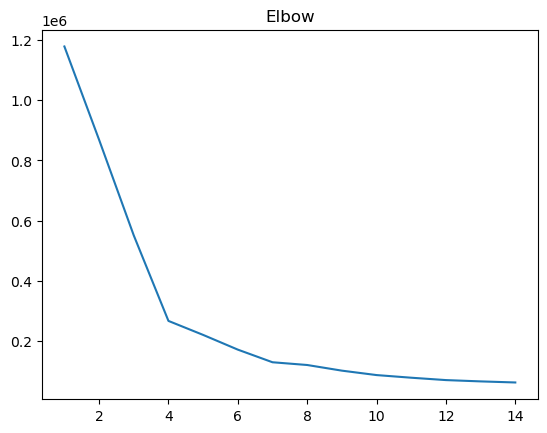

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = range(1,15) , y = inertia)
plt.title('Elbow')

In [60]:
km = KMeans(n_clusters = 4)
data['cluster'] = km.fit_predict(scalar_transform)

/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_3003/113676554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = km.fit_predict(scalar_transform)


# save the model

In [106]:
import pickle
with open('customer_segmentation.modle','wb') as file:
    pickle.dump(km , file)

In [61]:
data

,frequency,recency,total_amount_spend,cluster
0,297,373,5391.21,1
1,297,373,5391.21,1
2,297,373,5391.21,1
3,297,373,5391.21,1
4,297,373,5391.21,1
...,...,...,...,...
541904,52,0,862.81,0
541905,52,0,862.81,0
541906,52,0,862.81,0
541907,52,0,862.81,0


# testing new unseen data

In [94]:
import numpy as np
new_customer = np.array([[300,89,7000]])

In [102]:
scaler = StandardScaler()
new_customer_scaled = scaler.fit_transform(new_customer)

In [103]:
km.predict(new_customer_scaled)

array([0], dtype=int32)

# visualize after segmentation

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

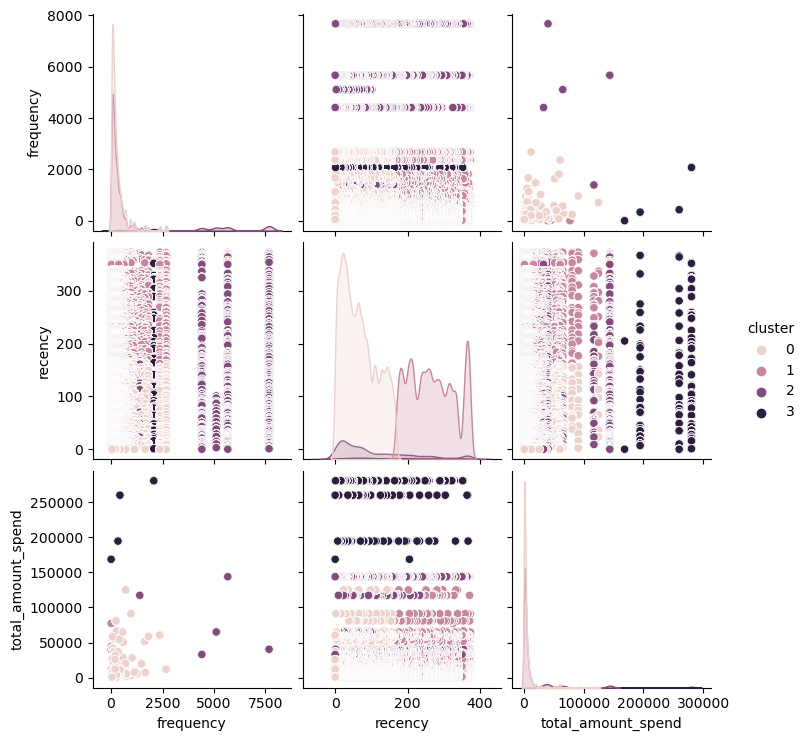

In [62]:
# Visualizing clusters
sns.pairplot(data, hue='cluster', diag_kind='kde')
plt.show()


In [63]:

# Cluster characteristics
cluster_summary = data.groupby('cluster').median()
print(cluster_summary)


         frequency  recency  total_amount_spend
cluster                                        
0            169.0     60.0             2209.36
1            192.0    263.0             2702.49
2           5670.0     73.0            40519.84
3           2076.0    121.0           280206.02


<Axes: xlabel='cluster'>

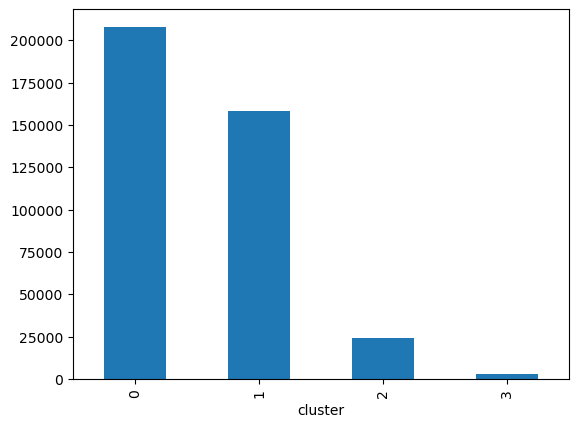

In [65]:
data['cluster'].value_counts().plot(kind = 'bar')

In [67]:
data.groupby(['cluster']).agg({
'recency':['mean','median'],
'frequency': ['mean','median'],
'total_amount_spend':['mean','median']})

recency           frequency         total_amount_spend           
               mean median         mean  median               mean     median
cluster                                                                      
0         67.321190   60.0   290.958890   169.0        4944.630987    2209.36
1        267.757766  263.0   335.096495   192.0        6546.341951    2702.49
2        109.633245   73.0  5787.824506  5670.0       72100.977060   40519.84
3        153.063598  121.0  1619.269852  2076.0      266844.946156  280206.02

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data)

In [71]:
data_pca[:,0]

array([ -6181.36992299,  -6181.36992299,  -6181.36992299, ...,
       -10714.36606942, -10714.36606942, -10714.36606942])

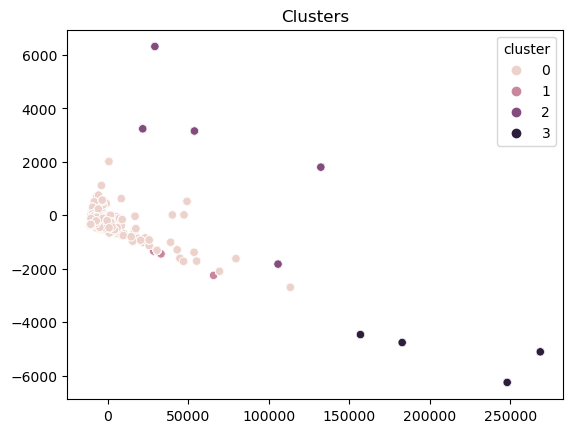

In [77]:
sns.scatterplot(x = data_pca[:,0],y = data_pca[:,1], hue=data['cluster'])
plt.title('Clusters')
plt.legend(title='cluster')
plt.show()

# Conclusion

In [86]:
# Conclusion for Cluster 0:

# Cluster 0 contains moderately active customers who make purchases fairly regularly but not as frequently as other 
# segments. They tend to spend a moderate amount, but there are a few high spenders that pull the mean higher. These
# customers may be targeted with engagement strategies or loyalty programs to increase their spending and frequency.


In [87]:
# Conclusion for Cluster 1:

# Cluster 1 has frequent customers, but they are less recent in terms of engagement. Despite their high frequency of 
# purchases, their spending may not be as high on average. These customers might benefit from re-engagement strategies
# to boost their recency and spending, possibly with discount offers or special deals for repeat buyers.

In [88]:
# Conclusion for Cluster 2:

# Cluster 2 represents highly frequent, high-spending customers. They are recently active and make significant 
# purchases. This group is a high-value segment and should be targeted with premium offers, loyalty programs, and
# exclusive perks to encourage further spending and ensure long-term loyalty.

In [89]:
# Conclusion for Cluster 3:

# Cluster 3 contains high-value customers with extremely high spend. Their recency is decent but not as recent as 
# Cluster 2. These are the premium customers who could be given special privileges, like personalized services or 
# exclusive offerings. Retention strategies like VIP loyalty programs would be effective for this cluster.


In [104]:
# Recommended Actions:
# Cluster 0: Focus on retention and re-engagement strategies to improve customer loyalty.
# Cluster 1: Use re-engagement and incentives to boost activity and increase spend.
# Cluster 2: Focus on exclusive offers, loyalty programs, and premium customer support.
# Cluster 3: Treat as VIP customers and give them personalized experiences and offers.

In [107]:
with open('customer_segmentation.modle','rb') as file:
    loaded_model = pickle.load(file)

In [109]:
loaded_model.predict(new_customer_scaled)

array([0], dtype=int32)

# using sql data for prediction

In [38]:
import mysql.connector
import pandas as pd

In [101]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='12312355@chendu',
    database='customer_segmentation'
)

In [102]:
cursor = conn.cursor()

In [95]:
df_new = df[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']]

In [116]:
df_new['InvoiceDate'] = df_new['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_3003/4203171837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['InvoiceDate'] = df_new['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [73]:
# Query to fetch all data from the 'customer_data' table
cursor.execute("SELECT * FROM customer_data")

# Fetch all the rows
result = cursor.fetchall()

# Display the result
for row in result:
    print(row)


('INV12345', 'SC001', 'Product A', 2, datetime.datetime(2024, 11, 27, 10, 30), Decimal('50.75'), 101, 'USA')


In [103]:
import pandas as pd

# Create a SQL query
query = "SELECT * FROM customer_data"

# Use pandas to execute the query and load the data into a DataFrame
sql_df = pd.read_sql(query, conn)


/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_1254/2503679987.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_df = pd.read_sql(query, conn)


In [104]:
sql_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [48]:
sql_df['Total_sales'] = sql_df['Quantity'] * sql_df['UnitPrice']

In [49]:
current_date = pd.to_datetime('2024-12-23')

In [61]:
testing = pd.DataFrame()

In [62]:
testing['recencyy'] = (current_date - sql_df['InvoiceDate']).dt.days

In [80]:
testing['frequent'] = sql_df.groupby('CustomerID')['InvoiceNo'].transform('count')

In [85]:
testing['total_amount'] = sql_df.groupby('CustomerID')['Total_sales'].transform('sum')

In [86]:
total_amount

CustomerID
101    101.5
Name: Total_sales, dtype: float64

In [87]:
testing

,recencyy,frequent,total_amount
0,25,1,101.5


In [88]:
from sklearn.preprocessing import StandardScaler
Std = StandardScaler()

In [89]:
scaled = Std.fit_transform(testing)

In [90]:
scaled.shape

(1, 3)

In [91]:
import pickle
with open('customer_segmentation.modle','rb') as file:
    model = pickle.load(file)

In [92]:
model.predict(scaled)

array([0], dtype=int32)

In [93]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'sales', 'date', 'frequency',
       'recency', 'total_amount_spend'],
      dtype='object')

# insert data to sql for sample

In [115]:
for_sql = df_new.sample(10000).reset_index()

In [116]:
for_sql

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,498604,578530,23154,SET OF 4 JAM JAR MAGNETS,12,2011-11-24 14:37:00,2.08,14251.0,United Kingdom
1,443997,574716,21619,4 VANILLA BOTANICAL CANDLES,1,2011-11-06 14:33:00,1.25,14502.0,United Kingdom
2,285776,561923,22906,12 MESSAGE CARDS WITH ENVELOPES,12,2011-08-01 12:16:00,1.65,14112.0,United Kingdom
3,276447,561047,21989,PACK OF 20 SKULL PAPER NAPKINS,12,2011-07-24 12:46:00,0.85,16948.0,United Kingdom
4,449280,575091,23366,SET 12 COLOURING PENCILS DOILY,16,2011-11-08 14:05:00,0.65,17160.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
9995,373209,569302,23368,SET 12 COLOUR PENCILS DOLLY GIRL,3,2011-10-03 12:04:00,0.65,16205.0,United Kingdom
9996,61579,541429,84519B,CARROT CHARLIE+LOLA COASTER SET,24,2011-01-18 09:44:00,1.25,14688.0,United Kingdom
9997,141361,548510,22029,SPACEBOY BIRTHDAY CARD,12,2011-03-31 15:02:00,0.42,17861.0,United Kingdom
9998,521200,580319,22072,RED RETROSPOT TEA CUP AND SAUCER,36,2011-12-02 15:39:00,1.25,15078.0,United Kingdom


In [119]:
for_sql['InvoiceDate'] = pd.to_datetime(for_sql['InvoiceDate'])

In [120]:
insert_query = """
    INSERT INTO customer_data 
    (InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

In [121]:
for _, row in for_sql.iterrows():
    cursor.execute(insert_query, (
        row['InvoiceNo'], 
        row['StockCode'], 
        row['Description'], 
        row['Quantity'], 
        row['InvoiceDate'].strftime('%Y-%m-%d %H:%M:%S'),  # Format datetime for MySQL
        row['UnitPrice'], 
        row['CustomerID'], 
        row['Country']
    ))


In [122]:
# Commit the transaction
conn.commit()

print("Data inserted successfully!")

Data inserted successfully!


In [123]:
conn.close()

# accessing the data from sql

In [163]:
import pandas as pd
import mysql.connector

# Connect to the database
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='12312355@chendu',
    database='customer_segmentation'
)

# Fetch raw data
raw_query = "SELECT * FROM customer_data"
df_raw = pd.read_sql(raw_query, conn)


/var/folders/3_/121mk5v92fsgc66gxg541l4w0000gn/T/ipykernel_1254/3196990513.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_raw = pd.read_sql(raw_query, conn)


In [164]:
df_raw.shape

(10000, 8)

In [165]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,578530,23154,SET OF 4 JAM JAR MAGNETS,12,2011-11-24 14:37:00,2.08,14251,United Kingdom
1,574716,21619,4 VANILLA BOTANICAL CANDLES,1,2011-11-06 14:33:00,1.25,14502,United Kingdom
2,561923,22906,12 MESSAGE CARDS WITH ENVELOPES,12,2011-08-01 12:16:00,1.65,14112,United Kingdom
3,561047,21989,PACK OF 20 SKULL PAPER NAPKINS,12,2011-07-24 12:46:00,0.85,16948,United Kingdom
4,575091,23366,SET 12 COLOURING PENCILS DOILY,16,2011-11-08 14:05:00,0.65,17160,United Kingdom


# make prediction using pickle file

In [166]:
from datetime import datetime

# Convert InvoiceDate to datetime
df_raw['InvoiceDate'] = pd.to_datetime(df_raw['InvoiceDate'])

# Add Recency (days since last purchase)
current_date = max_date
df_raw['Recency'] = (current_date - df_raw['InvoiceDate']).dt.days

# Calculate Monetary (total sales)
df_raw['Monetary'] = df_raw['Quantity'] * df_raw['UnitPrice']



In [167]:
# Aggregate by CustomerID
df_processed = df_raw.groupby('CustomerID').agg({
    'Recency': 'min',  # Recency
    'InvoiceNo': 'count',  # Frequency
    'Monetary': 'sum'  # Total monetary value
}).reset_index()

# Rename columns
df_processed.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [168]:
df_processed.head()

,CustomerID,Recency,Frequency,Monetary
0,12347,182,5,80.85
1,12348,318,1,41.76
2,12354,231,2,33.00
3,12356,245,1,12.75
4,12357,32,4,207.90


In [169]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_processed[['Recency', 'Frequency', 'Monetary']])

In [170]:
import pickle
with open('customer_segmentation.modle','rb') as file:
    model = pickle.load(file)

# add cluster to the dataframe

In [171]:
df_processed['Cluster'] = model.predict(scaled_data)

In [172]:
df_processed

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12347,182,5,80.85,1
1,12348,318,1,41.76,0
2,12354,231,2,33.00,0
3,12356,245,1,12.75,0
4,12357,32,4,207.90,0
...,...,...,...,...,...
2726,18261,95,1,9.95,0
2727,18265,71,1,9.95,0
2728,18272,2,3,56.22,0
2729,18283,8,19,55.67,1


In [173]:
cursor = conn.cursor()

In [175]:
df_processed['CustomerID'] = df_processed['CustomerID'].astype(int)
df_processed['Recency'] = df_processed['Recency'].astype(int)
df_processed['Frequency'] = df_processed['Frequency'].astype(int)
df_processed['Monetary'] = df_processed['Monetary'].astype(float)
df_processed['Cluster'] = df_processed['Cluster'].astype(int)

# Fill any NaN values (if applicable)
df_processed.fillna(0, inplace=True)


# insert output to the sql table

In [177]:
# Insert/Update clustered data
cursor = conn.cursor()

for _, row in df_processed.iterrows():
    cursor.execute("""
        INSERT INTO customer_segments (CustomerID, Recency, Frequency, Monetary, Cluster)
        VALUES (%s, %s, %s, %s, %s)
        ON DUPLICATE KEY UPDATE
        Recency = VALUES(Recency),
        Frequency = VALUES(Frequency),
        Monetary = VALUES(Monetary),
        Cluster = VALUES(Cluster)
    """, (
        int(row['CustomerID']),
        int(row['Recency']),
        int(row['Frequency']),
        float(row['Monetary']),
        int(row['Cluster'])
    ))

conn.commit()
cursor.close()
conn.close()
